In [1]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from dataset import MidiDataset
from config import *
print(torch.__version__)
print(torch.version.cuda)

2.7.1+cu118
11.8


In [2]:
dataset = MidiDataset(
        midi_dir=DATASET_DIR,
        metadata_csv_path=METADATA_CSV_PATH,
        num_bars=NUM_BARS,
        steps_per_bar=STEPS_PER_BAR,
        use_sliding_window=USE_SLIDING_WINDOW,
        stride_in_bars=STRIDE_IN_BARS
    )

Found 1276 MIDI files.
Processing MIDI files, normalizing tempo, and extracting segments...


Processing files: 100%|██████████| 1276/1276 [02:45<00:00,  7.69it/s]

Successfully extracted 105286 segments from 1276 files.


## Reconstruction

Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_10.pth
Converting tensor to MIDI file at reconstructed/10...
MIDI file saved successfully.


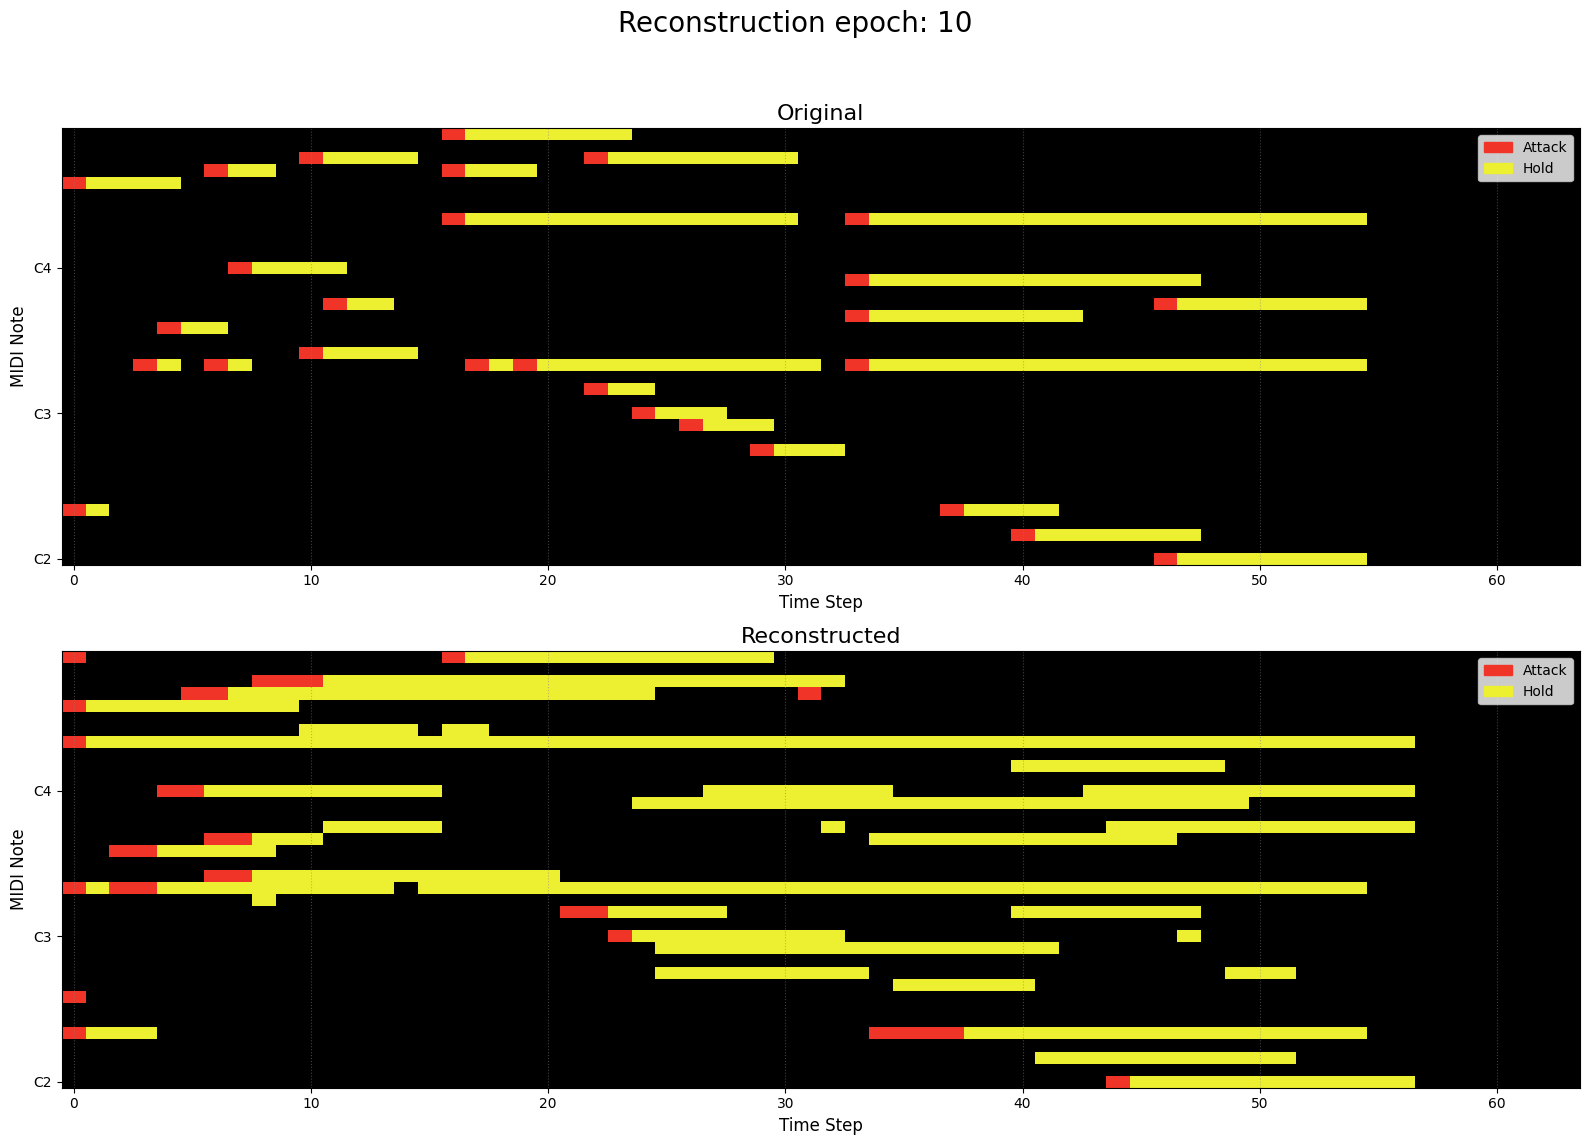

________________________________________________________________________________________________________________________


Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_50.pth
Converting tensor to MIDI file at reconstructed/50...
MIDI file saved successfully.


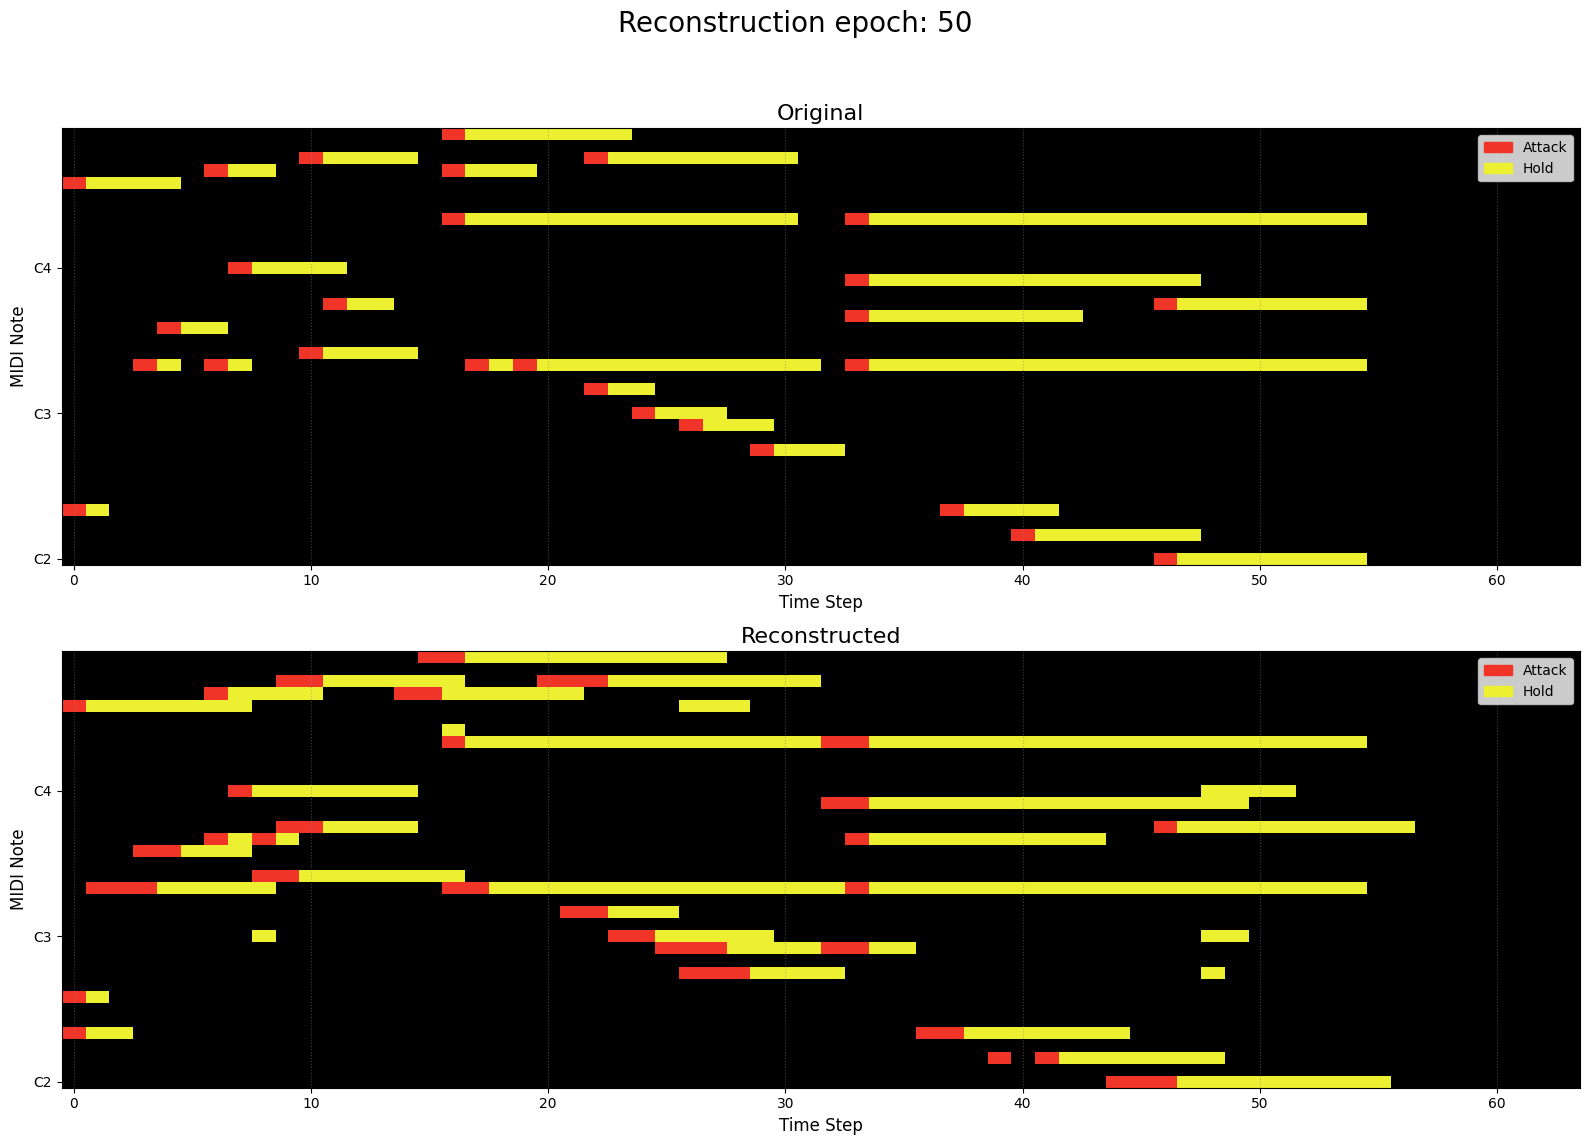

________________________________________________________________________________________________________________________


Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_100.pth
Converting tensor to MIDI file at reconstructed/100...
MIDI file saved successfully.


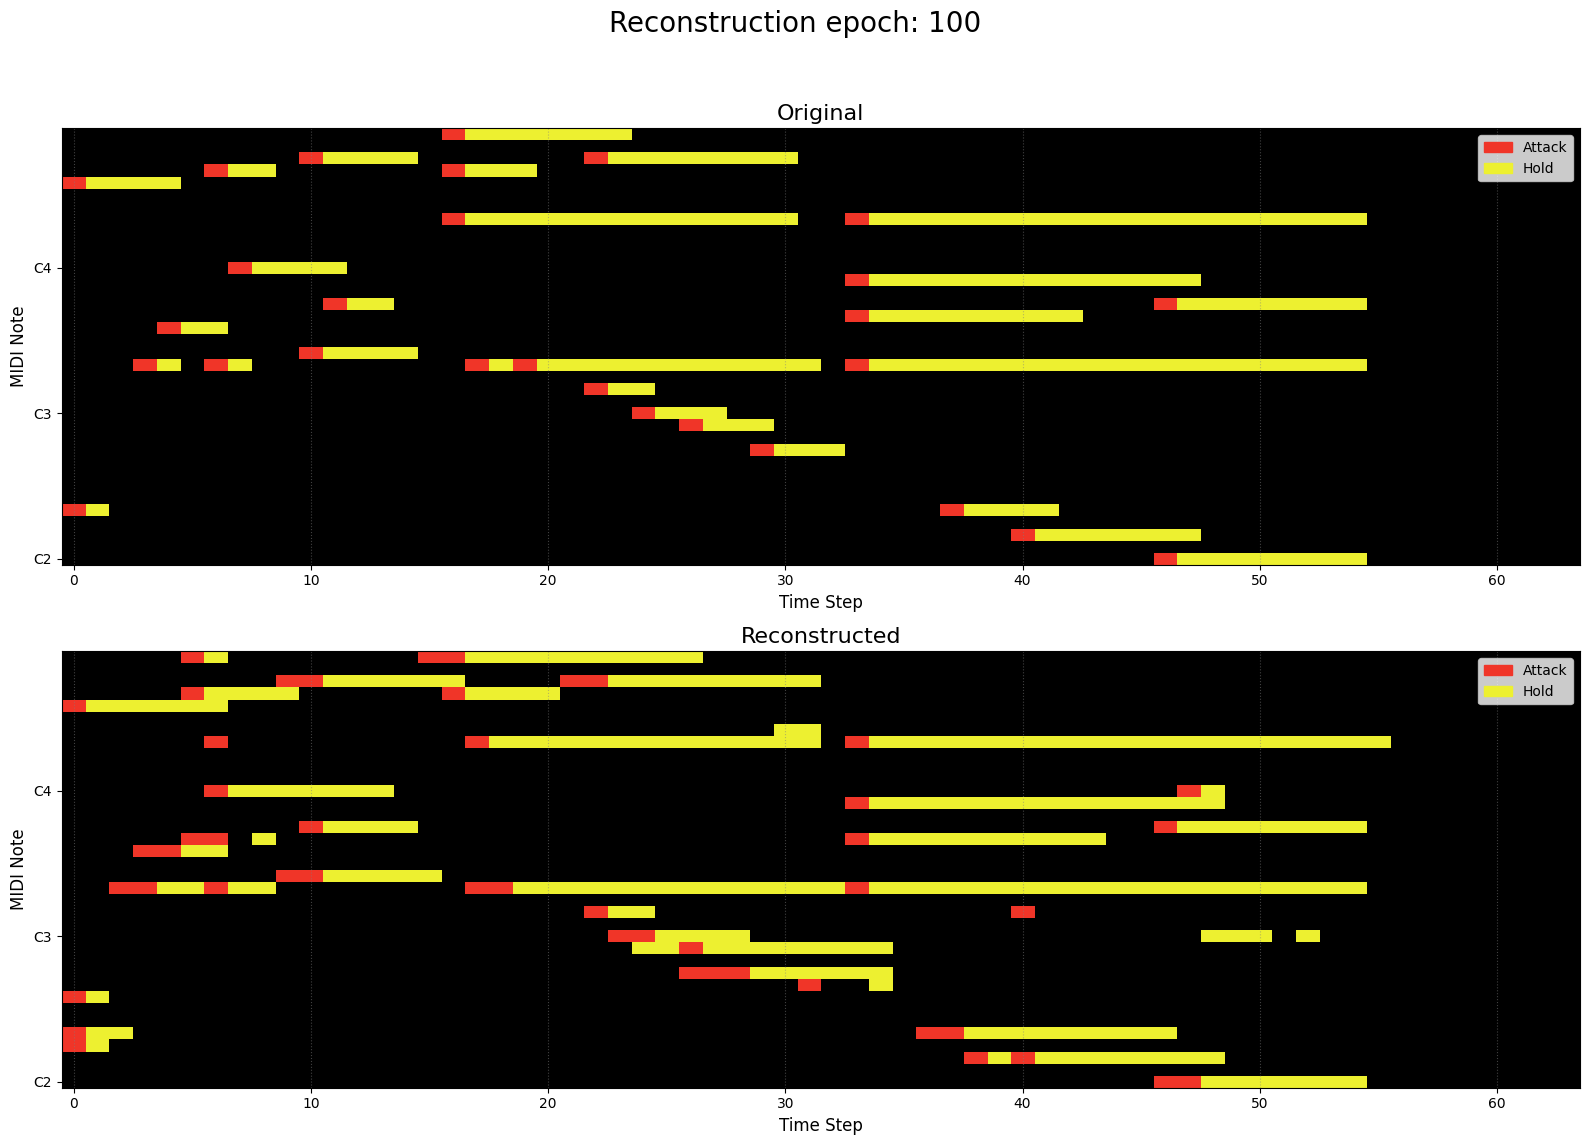

________________________________________________________________________________________________________________________


Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_120.pth
Converting tensor to MIDI file at reconstructed/120...
MIDI file saved successfully.


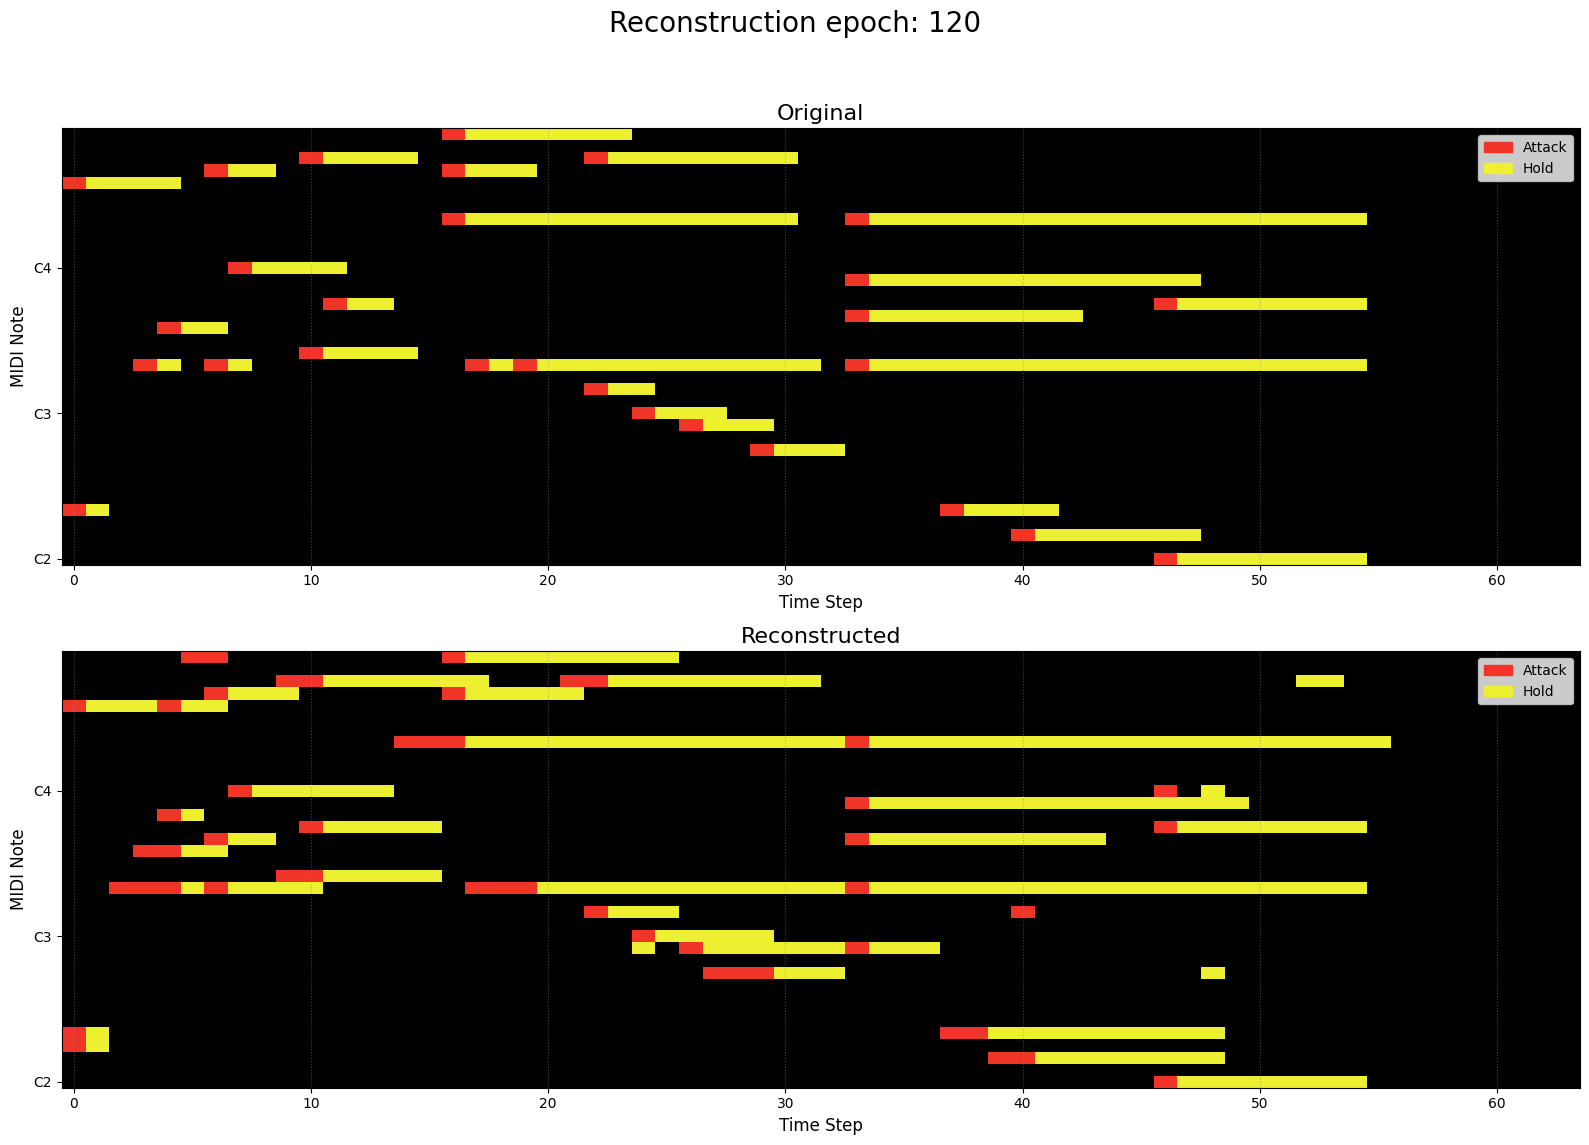

________________________________________________________________________________________________________________________


Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_130.pth
Converting tensor to MIDI file at reconstructed/130...
MIDI file saved successfully.


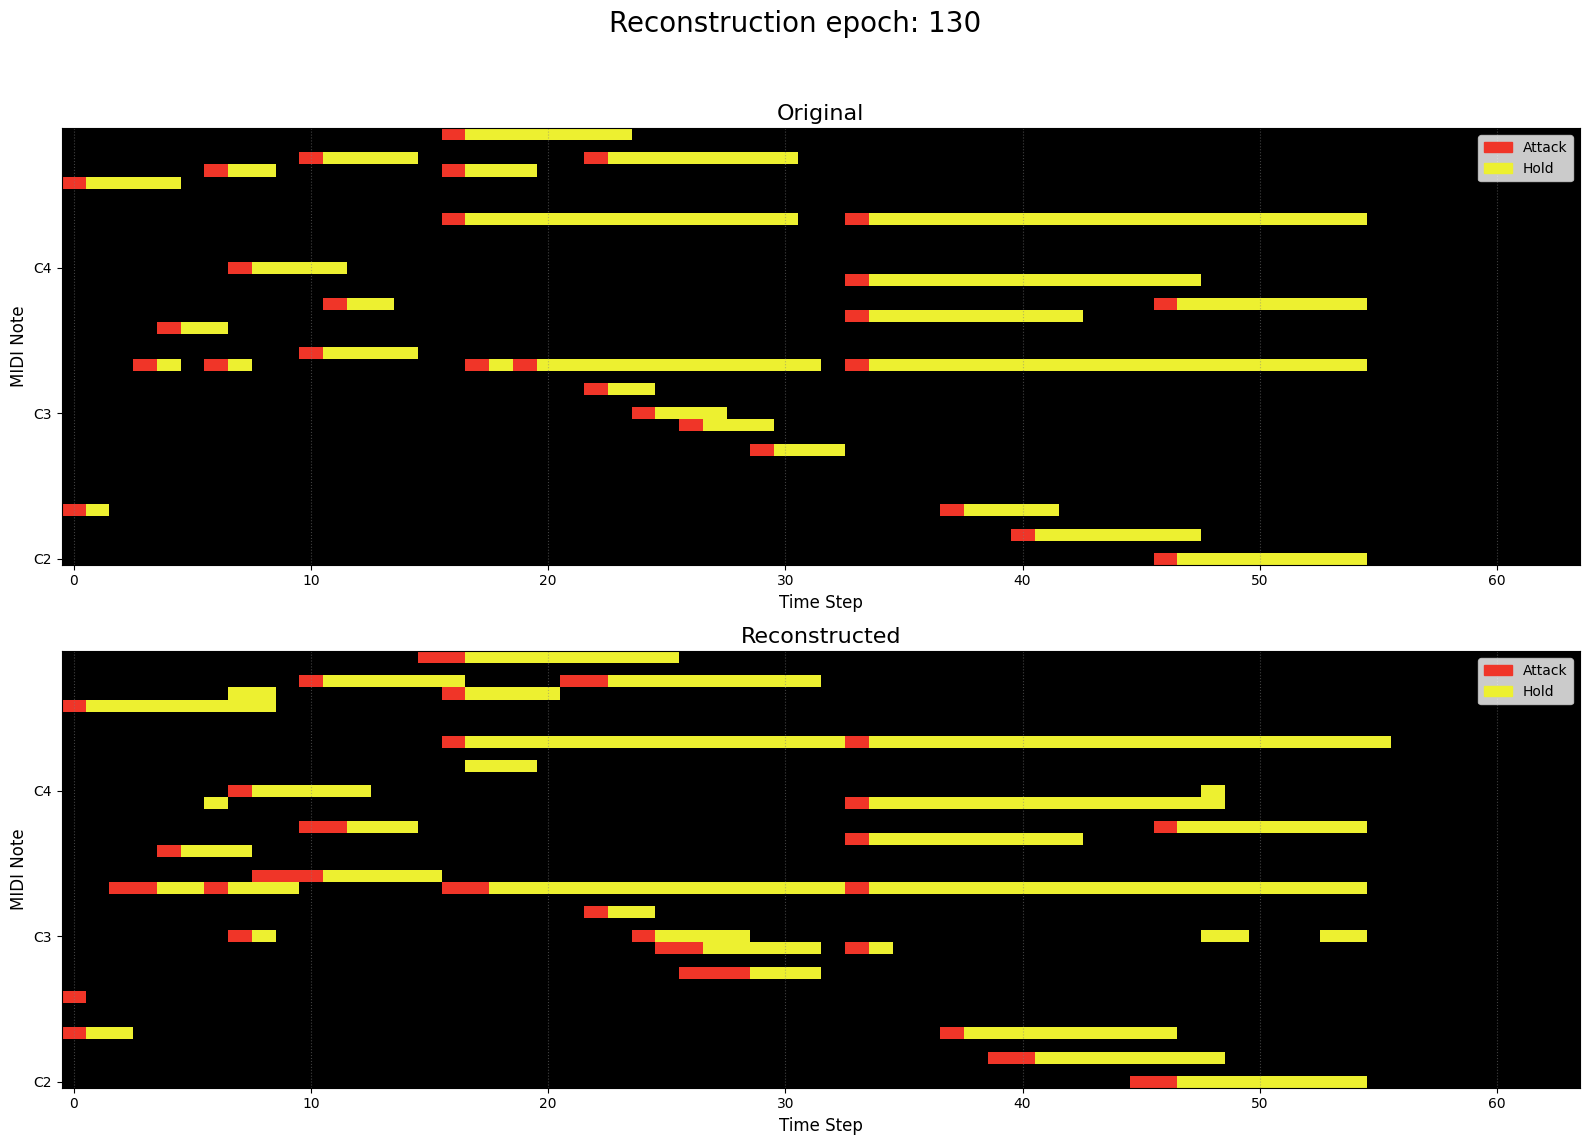

________________________________________________________________________________________________________________________


Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_135.pth
Converting tensor to MIDI file at reconstructed/135...
MIDI file saved successfully.


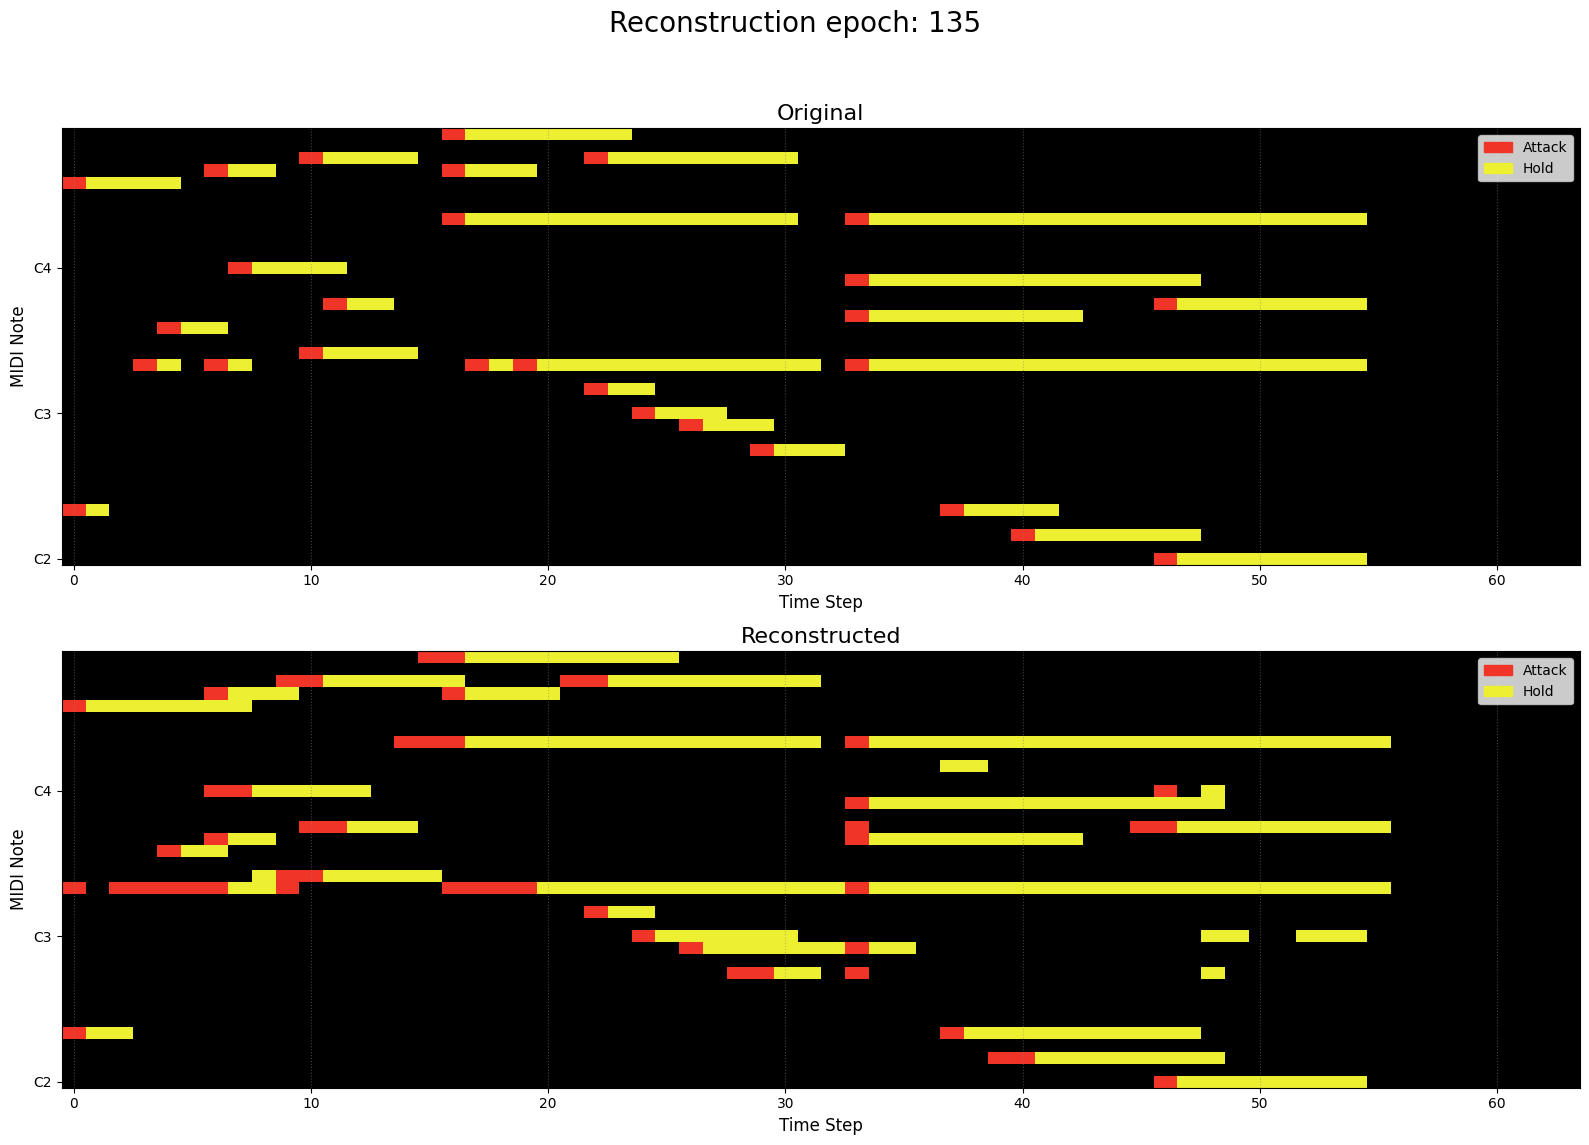

________________________________________________________________________________________________________________________




In [10]:
from matplotlib import pyplot as plt

for epoch in [10, 50, 100, 120, 130, 135]:
    model = LofiModel()
    model.load_weights(rf"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_{epoch}.pth")
    original_sequence_tensor, _ = dataset[90]
    # print(f"Processing file: {file_name}")
    reconstructions = model.reconstruct(original_sequence_tensor, output_path=f"reconstructed/{epoch}")

    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(f"Reconstruction epoch: {epoch}", fontsize=20)
    
    MidiDataset.visualize(original_sequence_tensor, title="Original", ax=axes[0], show_plot=False)
    MidiDataset.visualize(reconstructions, title="Reconstructed", ax=axes[1], show_plot=False)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    display(fig)
    plt.close(fig)
    
    print(60*"__"+"\n")
    print()